# Final Project - Currency trading project
By Gregory Martin

## Project Topic
My project will use data taken during the year of 2020. The data shows the trade cost of different currencies. For example, the trade between USD and CAD changes everyday. Over the course of a few years, I've tracked the changes between 6 different currencies planning on making a machine learning algorithm for trading currencies. Because of all the data, I've chosen a single day to look at. I randomly chose December 3rd, 2020 and pulled all the data that I gathered. I've gotten the currency exchange rates for the following currencies:

$$𝐴𝑈𝐷− > 𝑈𝑆𝐷$$
$$𝐸𝑈𝑅− > 𝑈𝑆𝐷$$
$$𝐺𝐵𝑃− > 𝑈𝑆𝐷$$
$$𝑈𝑆𝐷− > 𝐶𝐴𝐷$$
$$𝑈𝑆𝐷− > 𝐶𝐻𝐹$$
$$𝑈𝑆𝐷− > 𝐽𝑃𝑌$$

This is a classification problem because it's a set of discrete values that the dollar value could be. I want to study the data to see if there is a way to
accurately predict the following questions.
1) When is the best time to exchange currency (in general).\
2) What signs tell you that it's a good time to change between currencies.\
3) What signs tell you that it's a bad time to change between currencies.\

I gathered this data on my own from a website that reports the changing currency rates every few milliseconds. I took it from the website and loaded it into my SQL server. I stopped gathering data in 2020, so I have semi-current data points. I have 6 different CSV files for each currency rate. Each file has 3 columns. The first column named "CurrencyPair" is the name of the currency rate and is a string. For example, AUD/USD would be if you had $1 AUD then you could get the number noted in the "Price" column. The second column is the time and date (in military time) that the record was taken and is stored in the datestamp data type. The third column named "Price" just tells the price per base currency and is stored as a double.

## Data Cleaning and EDA
Before I can really use this data, I need to clean it a bit. I'll list each thing that I need to clean:

1) First of all, since I'm only using 1 day (December 3rd, 2020) I will get rid of that in the date column. The date column will only have the time so that I can see how the currency changes over the course of the day.\
2) We don't need the "CurrencyPair" column because we already know from the name of the dataframe which currency pair it is.  It's really just repeated and it's a waste of space in the table.

I will do these cleaning steps in the time between this part of the project and the next part of the project.
I think that one difficult part of this would be that we are only taking one day of the data. There are already a lot of entries for just one day. Given
more time and computer power, I might include extra days and/or compare it to the next month or year to see how it's changed.
Another difficulty I can see happening is that these is that in order to compare them all, they have to go through USD. I might have to make a
separate table where all the currencies are compared to USD to really be able to compare the others.


### Importing Data
First, you have to import the data and put them into pandas dataframes.

In [2]:
#Importing libraries
import math
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

#Importing files
AUD_USD = pd.read_csv('aud_usd.csv')
EUR_USD = pd.read_csv('eur_usd.csv')
GBP_USD = pd.read_csv('gbp_usd.csv')
USD_CAD = pd.read_csv('usd_cad.csv')
USD_CHF = pd.read_csv('usd_chf.csv')
USD_JPY = pd.read_csv('usd_jpy.csv')

#changing the timestamp to a proper datatype
pd.to_datetime(AUD_USD.Datestamp)
pd.to_datetime(EUR_USD.Datestamp)
pd.to_datetime(GBP_USD.Datestamp)
pd.to_datetime(USD_CAD.Datestamp)
pd.to_datetime(USD_CHF.Datestamp)
pd.to_datetime(USD_JPY.Datestamp);

### Data overview before cleaning

In [3]:
#Describing each currency pair
print("AUD to USD: ")
print(AUD_USD.describe())
print("")
print("EUR to USD: ")
print(EUR_USD.describe())
print("")
print("GBP to USD: ")
print(GBP_USD.describe())
print("")
print("USD to CAD: ")
print(USD_CAD.describe())
print("")
print("USD to CHF: ")
print(USD_CHF.describe())
print("")
print("USD to JPY: ")
print(USD_JPY.describe())

AUD to USD: 
             Price
count  8810.000000
mean      0.743360
std       0.000835
min       0.741020
25%       0.742773
50%       0.743350
75%       0.744090
max       0.745010

EUR to USD: 
              Price
count  78079.000000
mean       1.214096
std        0.001709
min        1.210170
25%        1.212640
50%        1.214450
75%        1.215220
max        1.217510

GBP to USD: 
              Price
count  40251.000000
mean       1.344887
std        0.003015
min        1.338270
25%        1.342920
50%        1.345270
75%        1.346940
max        1.350080

USD to CAD: 
              Price
count  19745.000000
mean       1.289238
std        0.002647
min        1.284850
25%        1.286770
50%        1.288350
75%        1.291600
max        1.294230

USD to CHF: 
             Price
count  7347.000000
mean      0.891907
std       0.001361
min       0.889220
25%       0.890830
50%       0.891440
75%       0.893150
max       0.894870

USD to JPY: 
              Price
count  58041.00

### Cleaning Data
Now, I will clean the date out of the "Datestamp" column because all of the data was taken over the course of one day.

In [4]:
#Fixing Datestamp to not include the date
AUD_USD['Datestamp'] = pd.to_datetime(AUD_USD['Datestamp']).dt.time
EUR_USD['Datestamp'] = pd.to_datetime(EUR_USD['Datestamp']).dt.time
GBP_USD['Datestamp'] = pd.to_datetime(GBP_USD['Datestamp']).dt.time
USD_CAD['Datestamp'] = pd.to_datetime(USD_CAD['Datestamp']).dt.time
USD_CHF['Datestamp'] = pd.to_datetime(USD_CHF['Datestamp']).dt.time
USD_JPY['Datestamp'] = pd.to_datetime(USD_JPY['Datestamp']).dt.time

#Showing changes
AUD_USD.head()

,CurrencyPair,Datestamp,Price
0,AUD/USD,00:00:04,0.74181
1,AUD/USD,00:00:05,0.74179
2,AUD/USD,00:00:12,0.74181
3,AUD/USD,00:00:20,0.74184
4,AUD/USD,00:00:53,0.74188


Next, I will take out the "CurrencyPair" column because that is unneeded data.

In [5]:
#Deleting CurrencyPair column
AUD_USD = AUD_USD.drop(labels = "CurrencyPair", axis = 1)
EUR_USD = EUR_USD.drop(labels = "CurrencyPair", axis = 1)
GBP_USD = GBP_USD.drop(labels = "CurrencyPair", axis = 1)
USD_CAD = USD_CAD.drop(labels = "CurrencyPair", axis = 1)
USD_CHF = USD_CHF.drop(labels = "CurrencyPair", axis = 1)
USD_JPY = USD_JPY.drop(labels = "CurrencyPair", axis = 1)

#Showing changes
AUD_USD.head()

,Datestamp,Price
0,00:00:04,0.74181
1,00:00:05,0.74179
2,00:00:12,0.74181
3,00:00:20,0.74184
4,00:00:53,0.74188


### Condensing Data
Now I can make all of the data into one table.  Since they all have the USD currency in common, you could compare all of the currencies to USD and then further compare each one.  Usually, the first currency in the currency pair is counted as 1 and the second currency is counted as the price listed in the later columns of the table.  We can reverse these to make them all "1 USD is equal to the price listed" by applying the following formula.

$$\frac{1}{price listed}$$

In [6]:
#Switching needed dataframes to be 1 USD to another currency
USD_AUD = AUD_USD
USD_AUD['Price'] = AUD_USD['Price'].apply(lambda x: 1 / x)

USD_EUR = EUR_USD
USD_EUR['Price'] = EUR_USD['Price'].apply(lambda x: 1 / x)

USD_GBP = GBP_USD
USD_GBP['Price'] = GBP_USD['Price'].apply(lambda x: 1 / x)

#Showing changes
USD_AUD.head()

,Datestamp,Price
0,00:00:04,1.348054
1,00:00:05,1.348090
2,00:00:12,1.348054
3,00:00:20,1.348000
4,00:00:53,1.347927


Since each data entry is when the currency changes, the currency stays the same for any times missing.  I will fill in any missing data with the previously recorded currency.  Finally, I'll put them all into one table so that I can analyze all the currencies at once.  In steps I will:

1. Fill in each data table with any missing times.  Each table will have the same number of rows (one row for each millisecond of the day) and a corresponding currency.  

2. I'll make a new table with a time stamp for each millisecond of the day with only one column named "Datestamp."

3. I'll add each currency's worth compared to 1 USD at each millisecond to create one big table.

In [7]:
#HAS LONG RUNTIME

#Creation of new dataframe
allCurrency = pd.DataFrame(columns = ['Time'])

#Creating a new dataframe incremented by milliseconds
for x in range(24):
    for y in range(60):
        for z in range(60):
            timestamp = pd.to_datetime('1-1-1 ' + str(x) + ':' + str(y) + ':' + str(z))
            allCurrency.loc[len(allCurrency.index)] = [timestamp]
            
#Getting rid of date to just have time
allCurrency['Time'] = pd.to_datetime(allCurrency['Time']).dt.time

In [8]:
#HAS LONG RUNTIME
#Adding each currency to the bigger table
allCurrency['AUD'] = ""
allCurrency['EUR'] = ""
allCurrency['GBP'] = ""
allCurrency['CAD'] = ""
allCurrency['CHF'] = ""
allCurrency['JPY'] = ""

AUDrowCountofCurrency = 0
EURrowCountofCurrency = 0
GBProwCountofCurrency = 0
CADrowCountofCurrency = 0
CHFrowCountofCurrency = 0
JPYrowCountofCurrency = 0

for x in range(len(allCurrency)):
    AUD_time = USD_AUD.loc[AUDrowCountofCurrency].Datestamp
    EUR_time = USD_EUR.loc[EURrowCountofCurrency].Datestamp
    GBP_time = USD_GBP.loc[GBProwCountofCurrency].Datestamp
    CAD_time = USD_CAD.loc[CADrowCountofCurrency].Datestamp
    CHF_time = USD_CHF.loc[CHFrowCountofCurrency].Datestamp
    JPY_time = USD_JPY.loc[JPYrowCountofCurrency].Datestamp
    time = allCurrency.loc[x].Time
    
    if (AUD_time == time):
        allCurrency.loc[x].AUD = USD_AUD.loc[AUDrowCountofCurrency].Price
        AUDrowCountofCurrency = AUDrowCountofCurrency + 1
        
    if (EUR_time == time):
        allCurrency.loc[x].EUR = USD_EUR.loc[EURrowCountofCurrency].Price
        EURrowCountofCurrency = EURrowCountofCurrency + 1
        
    if (GBP_time == time):
        allCurrency.loc[x].GBP = USD_GBP.loc[GBProwCountofCurrency].Price
        GBProwCountofCurrency = GBProwCountofCurrency + 1
        
    if (CAD_time == time):
        allCurrency.loc[x].CAD = USD_CAD.loc[CADrowCountofCurrency].Price
        CADrowCountofCurrency = CADrowCountofCurrency + 1
        
    if (CHF_time == time):
        allCurrency.loc[x].CHF = USD_CHF.loc[CHFrowCountofCurrency].Price
        CHFrowCountofCurrency = CHFrowCountofCurrency + 1
        
    if (JPY_time == time):
        allCurrency.loc[x].JPY = USD_JPY.loc[JPYrowCountofCurrency].Price
        JPYrowCountofCurrency = JPYrowCountofCurrency + 1

In [9]:
#Fills in missing values of what the currency was instead of just when the currency value changed
AUDprice = 1.348054
EURprice = 0
GBPprice = 0
CADprice = 1.29281
CHFprice = 0.89393
JPYprice = 104.455

for x in range(0, len(allCurrency)):
    if (allCurrency.loc[x, 'AUD'] == ""):
        allCurrency.loc[x, 'AUD'] = AUDprice
    else:
        AUDprice = allCurrency.loc[x, 'AUD']
        
    if (allCurrency.loc[x, 'EUR'] == ""):
        allCurrency.loc[x, 'EUR'] = EURprice
    else:
        EURprice = allCurrency.loc[x, 'EUR']
        
    if (allCurrency.loc[x, 'GBP'] == ""):
        allCurrency.loc[x, 'GBP'] = GBPprice
    else:
        GBPprice = allCurrency.loc[x, 'GBP']
        
    if (allCurrency.loc[x, 'CAD'] == ""):
        allCurrency.loc[x, 'CAD'] = CADprice
    else:
        CADprice = allCurrency.loc[x, 'CAD']
        
    if (allCurrency.loc[x, 'CHF'] == ""):
        allCurrency.loc[x, 'CHF'] = CHFprice
    else:
        CHFprice = allCurrency.loc[x, 'CHF']
        
    if (allCurrency.loc[x, 'JPY'] == ""):
        allCurrency.loc[x, 'JPY'] = JPYprice
    else:
        JPYprice = allCurrency.loc[x, 'JPY']

### Data overview after cleaning
Now we can look at an overview of the cleaned data.

In [10]:
#Describing each currency pair
print("AUD to USD: ")
print(AUD_USD.describe())
print("")
print("EUR to USD: ")
print(EUR_USD.describe())
print("")
print("GBP to USD: ")
print(GBP_USD.describe())
print("")
print("USD to CAD: ")
print(USD_CAD.describe())
print("")
print("USD to CHF: ")
print(USD_CHF.describe())
print("")
print("USD to JPY: ")
print(USD_JPY.describe())

#Describing the large newly made table
print("")
print("Newly made all currency pairs table: ")
print(allCurrency.describe())

AUD to USD: 
             Price
count  8810.000000
mean      1.345245
std       0.001511
min       1.342264
25%       1.343923
50%       1.345261
75%       1.346307
max       1.349491

EUR to USD: 
              Price
count  78079.000000
mean       0.823660
std        0.001160
min        0.821348
25%        0.822896
50%        0.823418
75%        0.824647
max        0.826330

GBP to USD: 
              Price
count  40251.000000
mean       0.743561
std        0.001668
min        0.740697
25%        0.742424
50%        0.743345
75%        0.744646
max        0.747233

USD to CAD: 
              Price
count  19745.000000
mean       1.289238
std        0.002647
min        1.284850
25%        1.286770
50%        1.288350
75%        1.291600
max        1.294230

USD to CHF: 
             Price
count  7347.000000
mean      0.891907
std       0.001361
min       0.889220
25%       0.890830
50%       0.891440
75%       0.893150
max       0.894870

USD to JPY: 
              Price
count  58041.00

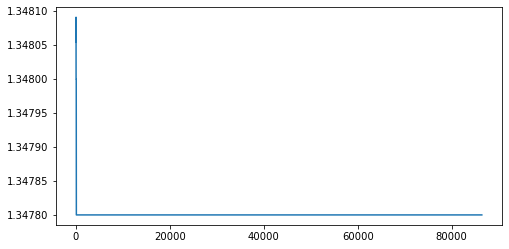

In [11]:
fig, ax = plt.subplots(nrows = 1, ncols = 1, figsize = (8,4))
ax.plot(allCurrency['AUD'])